Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [2]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [4]:
x_train = x_train.astype('float32') #from int to float
x_test = x_test.astype('float32')

x_train /= 255 #normalize values, instead of 0-255 range get a 0-1 range
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes) #one-hot encoding of labels eg label 1 => [0 1 0 0 0 0 0 0 0 0] (length 10)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)   #label n is an array of length 10 with zeros everywhere except position n


In [5]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4812 - accuracy: 0.8628 - val_loss: 0.2700 - val_accuracy: 0.9185
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2314 - accuracy: 0.9325 - val_loss: 0.2081 - val_accuracy: 0.9375
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1773 - accuracy: 0.9484 - val_loss: 0.1562 - val_accuracy: 0.9537
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.9581 - val_loss: 0.1378 - val_accuracy: 0.9587
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9638 - val_loss: 0.1355 - val_accuracy: 0.9595
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1069 - accuracy: 0.9686 - val_loss: 0.1137 - val_accuracy: 0.9647
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9724 - val_loss: 0.1136 - val_accuracy: 0.9650
Epoch 

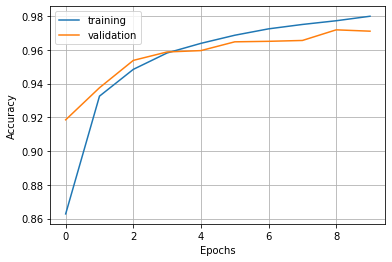

In [6]:
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(fit_info.history["accuracy"], label = "training")
plt.plot(fit_info.history["val_accuracy"], label = "validation")
plt.legend()
plt.show()

In [48]:
#runs slow, ~30 min. results stored in csv files

#l2s = np.linspace(1e-6, 1e-3, 5)
l2s = np.logspace(-6, -3, 5)
res = []

#5 different l2 vals
for i, l2 in enumerate(l2s):
    #3 different networks
    for j in range(3):
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l2)))
        model.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l2)))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'])

        fit_info = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=0,
                    validation_data=(x_test, y_test))

        score = model.evaluate(x_test, y_test, verbose=0)
        print(f'Run {i+1}.{j+1}\nTest loss: {score[0]}, Test accuracy {score[1]}')
        res.append(score)

# pd.DataFrame(res, columns=["loss", "accuracy"]).to_csv("res_lin.csv")
pd.DataFrame(res, columns=["loss", "accuracy"]).to_csv("res_log.csv")
res = np.array(res)

Run 1.1
Test loss: 0.0677601620554924, Test accuracy 0.9822999835014343
Run 1.2
Test loss: 0.0690857395529747, Test accuracy 0.9821000099182129
Run 1.3
Test loss: 0.06704596430063248, Test accuracy 0.9818999767303467
Run 2.1
Test loss: 0.0734657496213913, Test accuracy 0.9811000227928162
Run 2.2
Test loss: 0.06824786961078644, Test accuracy 0.9825000166893005
Run 2.3
Test loss: 0.06925181299448013, Test accuracy 0.9822999835014343
Run 3.1
Test loss: 0.09068135172128677, Test accuracy 0.9815000295639038
Run 3.2
Test loss: 0.09061364829540253, Test accuracy 0.9817000031471252
Run 3.3
Test loss: 0.09485569596290588, Test accuracy 0.9817000031471252
Run 4.1
Test loss: 0.12353949248790741, Test accuracy 0.9829000234603882
Run 4.2
Test loss: 0.1266596019268036, Test accuracy 0.9818999767303467
Run 4.3
Test loss: 0.1283694952726364, Test accuracy 0.9821000099182129
Run 5.1
Test loss: 0.12272976338863373, Test accuracy 0.9807000160217285
Run 5.2
Test loss: 0.12356147170066833, Test accuracy 0.

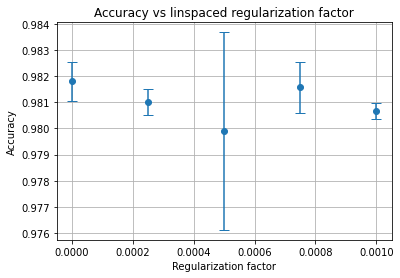

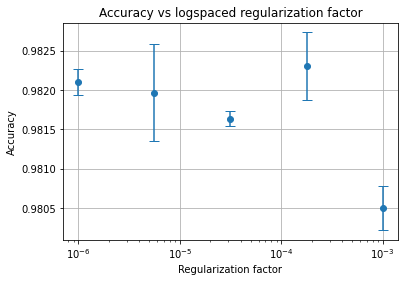

In [7]:

df_lin = pd.read_csv("res_lin.csv")
df_log = pd.read_csv("res_log.csv")

def plot_df(df, log = False):
    l2s = np.linspace(1e-6, 1e-3, 5)
    if log:
        l2s = np.logspace(-6, -3, 5)
    res = df.to_numpy()[:, 1:]
    avg_std = []

    for i in range(int(len(res)/3)):
        avg = np.average(res[3*i:3*(i+1), 1])
        std = np.std(res[3*i:3*(i+1), 1])
        avg_std.append((avg, std))

    avg_std = np.array(avg_std)

    if log:
        plt.title("Accuracy vs logspaced regularization factor")
    else:
        plt.title("Accuracy vs linspaced regularization factor")
    plt.errorbar(l2s, avg_std[:, 0], avg_std[:, 1], fmt="o", capsize=5)
    if log:
        plt.xscale("log")
    plt.grid(True)
    plt.xlabel("Regularization factor")
    plt.ylabel("Accuracy")
    plt.show()

plot_df(df_lin)
plot_df(df_log, True)


In [8]:
print("lin", max(df_lin["accuracy"]))

print("log", max(df_log["accuracy"]))
print(np.logspace(-6,-3,5))
print(np.linspace(1e-6, 1e-3, 5))


lin 0.9830999970436096
log 0.9829000234603882
[1.00000000e-06 5.62341325e-06 3.16227766e-05 1.77827941e-04
 1.00000000e-03]
[1.0000e-06 2.5075e-04 5.0050e-04 7.5025e-04 1.0000e-03]


### Question 3) Convolutional layers

In [10]:
inputs = keras.Input(shape=(28,28,1))
c1 = Conv2D(32, 3, activation = "relu")(inputs)
c2 = Conv2D(64, 3, activation = "relu")(c1)
mp = MaxPooling2D()(c2)
# do = Dropout(0.5)(mp, training = True)
ft = Flatten()(mp)
d = Dense(64, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.0005))(ft)
# do2 = Dropout(0.5)(d)
outputs = Dense(10, activation="softmax")(d)
model = keras.Model(inputs, outputs)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}, Test accuracy {score[1]}')

Epoch 1/10
469/469 [==============================] - 57s 120ms/step - loss: 0.4151 - accuracy: 0.8933 - val_loss: 0.2256 - val_accuracy: 0.9486
Epoch 2/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1529 - accuracy: 0.9733 - val_loss: 0.1282 - val_accuracy: 0.9805
Epoch 3/10
469/469 [==============================] - 57s 123ms/step - loss: 0.1185 - accuracy: 0.9821 - val_loss: 0.1177 - val_accuracy: 0.9820
Epoch 4/10
469/469 [==============================] - 55s 118ms/step - loss: 0.1013 - accuracy: 0.9862 - val_loss: 0.1032 - val_accuracy: 0.9841
Epoch 5/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0901 - accuracy: 0.9881 - val_loss: 0.0899 - val_accuracy: 0.9875
Epoch 6/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0809 - accuracy: 0.9901 - val_loss: 0.0843 - val_accuracy: 0.9878
Epoch 7/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0710 - accuracy: 0.9927 - val_loss: 0.0831 - val_ac

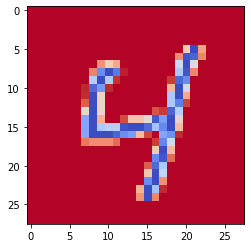

Number read: 4


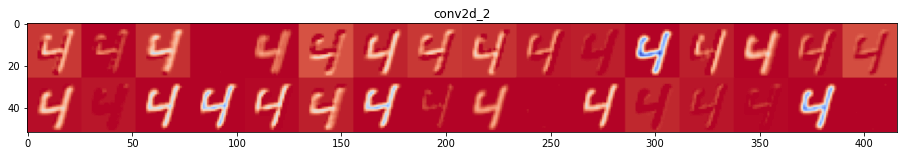

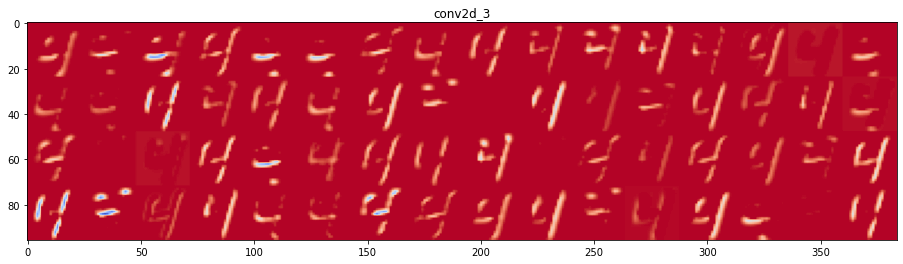

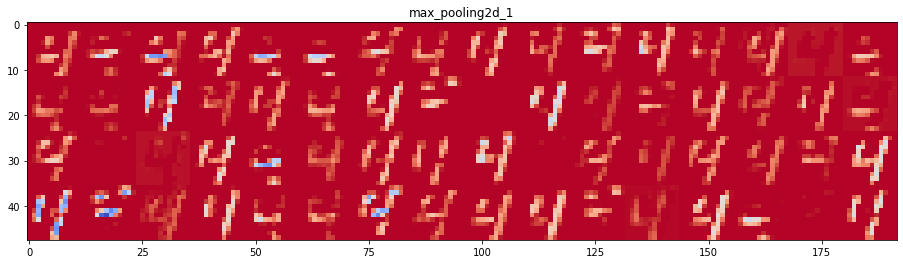

In [61]:
image_num = 3332

plt.imshow(x_test[image_num])
plt.set_cmap("coolwarm")
plt.show()
print(f"Number read: {np.argmax(model.predict_on_batch(x_test[image_num:image_num+1]))}")

###Code below is adapted from https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md#visualizing-every-channel-in-every-intermediate-activation

layer_outputs = [layer.output for layer in model.layers[1:4]] # Extracts the outputs of the top 4 layers
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[image_num:image_num+1]) # Returns a list of five Numpy arrays: one array per layer activation

layer_names = []
for layer in model.layers[1:4]:    
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid)

### Question 4) Auto-Encoder for denoising


In [12]:
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [13]:

latent_dim = 40  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoned, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 6s 6ms/step - loss: 0.1922 - val_loss: 0.1562
Epoch 2/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1498 - val_loss: 0.1428
Epoch 3/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1408 - val_loss: 0.1368
Epoch 4/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1359 - val_loss: 0.1347
Epoch 5/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1329 - val_loss: 0.1320
Epoch 6/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1309 - val_loss: 0.1312
Epoch 7/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1295 - val_loss: 0.1294
Epoch 8/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1284 - val_loss: 0.1296
Epoch 9/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1276 - val_loss: 0.1287
Epoch 10/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1268 - val_loss: 0.1283

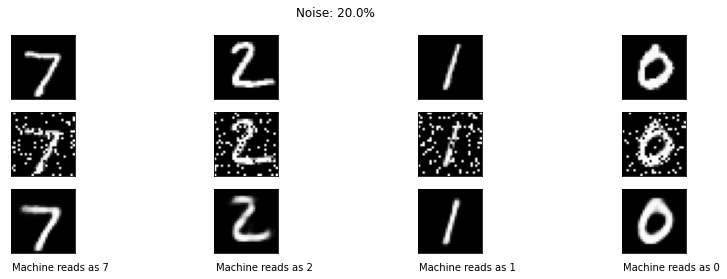

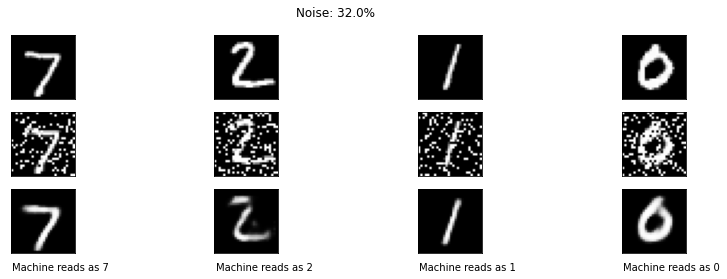

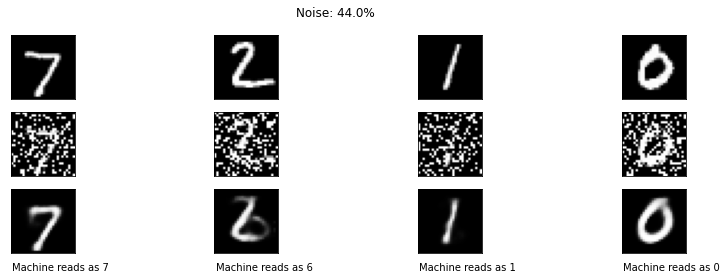

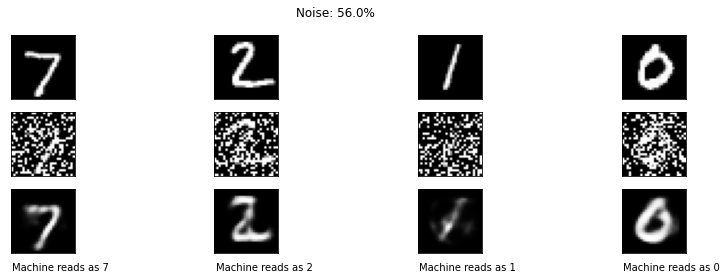

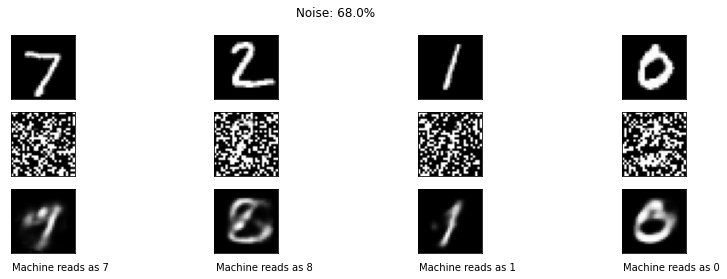

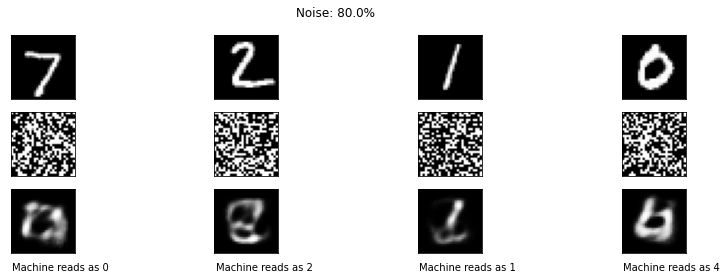

In [31]:
noise = np.linspace(0.2, 0.8, 6)

for j in range(len(noise)):
    flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise[j]) 
    decoded_images = autoencoder.predict(flattened_x_test_seasoned)
    n_images = 4 
    plt.figure(figsize=(14, 4))
    plt.suptitle(f"Noise: {noise[j]*100:.1f}%")

    for i in range(n_images):
        # Plotting orginal picture
        ax = plt.subplot(3, n_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plotting the seasoned image
        ax = plt.subplot(3, n_images, n_images + i + 1)
        plt.imshow(flattened_x_test_seasoned[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plotting the denoised image
        ax = plt.subplot(3, n_images, 2*n_images + i + 1)
        plt.imshow(decoded_images[i].reshape(28, 28))
        plt.text(0, 35, f"Machine reads as {np.argmax(model.predict(np.expand_dims(decoded_images[i].reshape(28,28), axis=0)))}")        
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


### Noising and denoising before predicting

noise  0.0
noise  0.07142857142857142
noise  0.14285714285714285
noise  0.21428571428571427
noise  0.2857142857142857
noise  0.3571428571428571
noise  0.42857142857142855
noise  0.5
noise  0.5714285714285714
noise  0.6428571428571428
noise  0.7142857142857142
noise  0.7857142857142857
noise  0.8571428571428571
noise  0.9285714285714285
noise  1.0


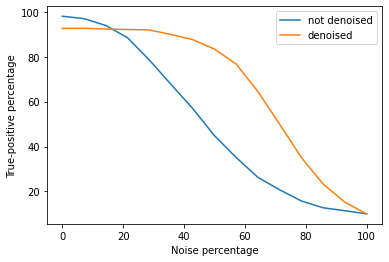

In [42]:
noise = np.linspace(0, 1, 15)

score_noise = []
score_denoised = []

for n in noise:
    print("noise ", n)
    #creating datasets
    flattened_x_test_salted = salt_and_pepper(flattened_x_test, n)
    flattened_x_test_denoised = autoencoder.predict(flattened_x_test_salted)

    score_noise.append(model.evaluate(flattened_x_test_salted.reshape(-1, 28, 28, 1), y_test, verbose=0)[1])
    score_denoised.append(model.evaluate(flattened_x_test_denoised.reshape(-1, 28, 28, 1), y_test, verbose=0)[1])

plt.plot(noise*100, np.array(score_noise)*100, label="not denoised")
plt.plot(noise*100, np.array(score_denoised)*100, label="denoised")
plt.xlabel("Noise percentage")
plt.ylabel("True-positive percentage")
plt.legend()
plt.show()

    


### Creating fake handwriting
##### Encoding and decoding

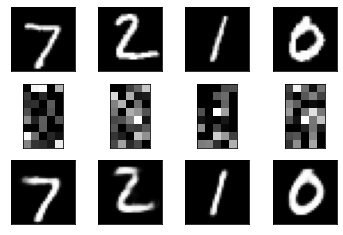

In [16]:
encoded_image = encoder_only.predict(flattened_x_test)
decoded_images = decoder.predict(encoded_image)
n_images = 4 

for i in range(n_images):
    # Plotting orginal picture
    ax = plt.subplot(3, n_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plotting the encoded image
    ax = plt.subplot(3, n_images, n_images + i + 1)
    plt.imshow(encoded_image[i].reshape(8, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plotting the decoded image
    ax = plt.subplot(3, n_images, 2*n_images + i + 1)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Creating fakes by combining random digit's encodings

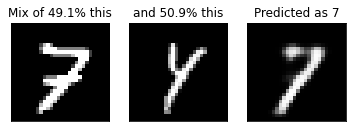

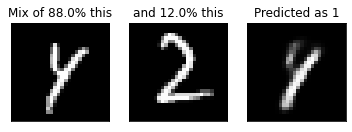

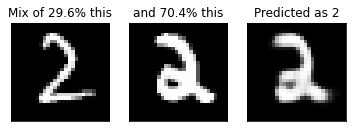

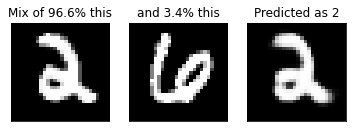

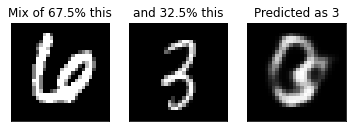

In [17]:
for i in range(510, 515):
    p = np.random.uniform(0,1)

    ax = plt.subplot(1, 3, 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f"Mix of {p*100:.1f}% this")

    ax = plt.subplot(1, 3, 2)
    plt.title(f"and {(1-p)*100:.1f}% this")
    plt.imshow(x_test[i+1])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, 3, 3)
    a = (encoded_image[i]*p + encoded_image[i+1]*(1-p)).reshape(-1, latent_dim)           
    fake = decoder.predict(a).reshape(28, 28)
    plt.imshow(fake)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fake = np.expand_dims(fake, axis=0)
    plt.title(f"Predicted as {np.argmax(model.predict(fake))}") 

    plt.show()


### Creating fakes by salting encodings

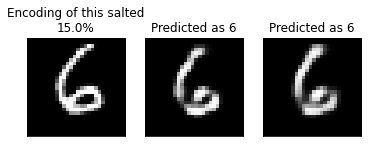

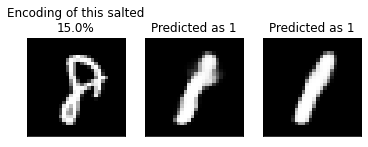

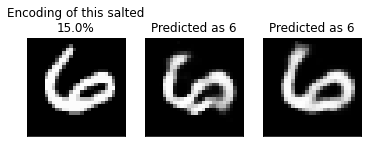

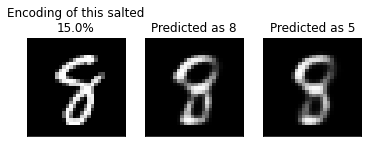

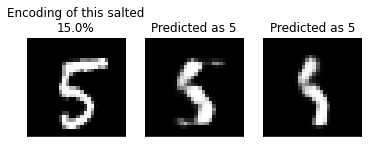

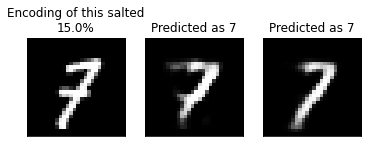

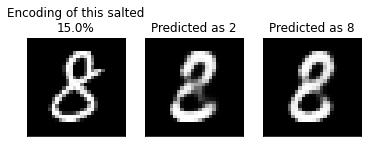

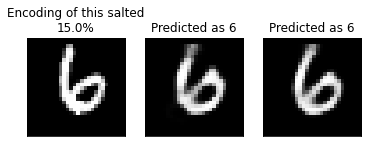

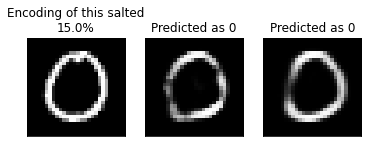

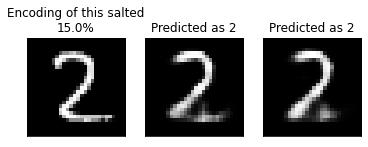

In [30]:
def salt_and_pepper_continous(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits _between_ 0 and 1.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.uniform(min(input), max(input), size=input.shape)       
    return input*a + (1-a)*b


noise = 0.15
for i in range(600, 610):
    new_encoding = salt_and_pepper_continous(encoded_image[i], noise)

    ax = plt.subplot(1, 3, 1)
    plt.title(f"Encoding of this salted\n{(noise)*100:.1f}%")
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   

    ax = plt.subplot(1, 3, 2)
    new_encoding = np.expand_dims(new_encoding, axis=0)
    fake = decoder.predict(new_encoding.reshape(-1, latent_dim)).reshape(28, 28)
    plt.imshow(fake)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fake = np.expand_dims(fake, axis=0)
    plt.title(f"Predicted as {np.argmax(model.predict(fake))}") 

    ax = plt.subplot(1, 3, 3)
    fake = autoencoder.predict(fake.reshape(1,28*28)).reshape(28,28)
    plt.imshow(fake)
    fake = np.expand_dims(fake, axis=0)
    plt.title(f"Predicted as {np.argmax(model.predict(fake))}") 

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    

In [64]:

latent_dim = 2

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder2 = keras.Model(input_image, decoded)
encoder_only2 = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder2.layers[-2:])
decoder2 = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

fit_info_AE = autoencoder2.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoned, flattened_x_test))

Epoch 1/32
938/938 [==============================] - 5s 5ms/step - loss: 0.2651 - val_loss: 0.3128
Epoch 2/32
938/938 [==============================] - 4s 5ms/step - loss: 0.2435 - val_loss: 0.2905
Epoch 3/32
938/938 [==============================] - 4s 5ms/step - loss: 0.2228 - val_loss: 0.2697
Epoch 4/32
938/938 [==============================] - 5s 5ms/step - loss: 0.2162 - val_loss: 0.2588
Epoch 5/32
938/938 [==============================] - 4s 5ms/step - loss: 0.2128 - val_loss: 0.2626
Epoch 6/32
938/938 [==============================] - 4s 5ms/step - loss: 0.2105 - val_loss: 0.2559
Epoch 7/32
938/938 [==============================] - 5s 5ms/step - loss: 0.2087 - val_loss: 0.2579
Epoch 8/32
938/938 [==============================] - 5s 5ms/step - loss: 0.2072 - val_loss: 0.2582
Epoch 9/32
938/938 [==============================] - 4s 5ms/step - loss: 0.2059 - val_loss: 0.2606
Epoch 10/32
938/938 [==============================] - 4s 5ms/step - loss: 0.2048 - val_loss: 0.2604

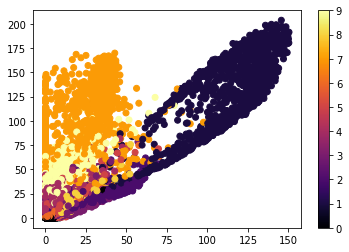

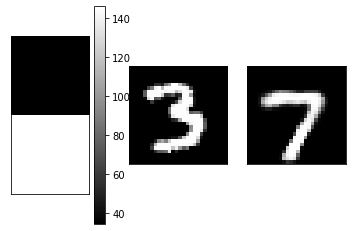

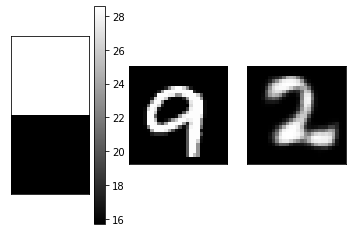

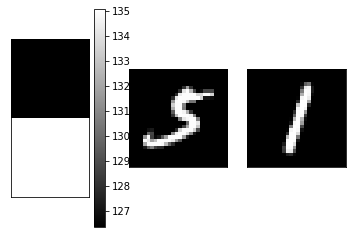

In [65]:
encoded_image = encoder_only2.predict(flattened_x_test)
actual_image = x_test[500:503]


plt.scatter(encoded_image[:, 0], encoded_image[:, 1], c = lbl_test)
plt.inferno()
plt.colorbar()
plt.show()
plt.gray()
for a_img, e_img in zip(actual_image, encoded_image):
    ax = plt.subplot(1, 3, 1)
    plt.imshow(e_img.reshape(2,1))    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar()

    ax = plt.subplot(1, 3, 2)
    plt.imshow(a_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, 3, 3)
    plt.imshow(decoder2.predict(np.expand_dims(e_img, axis=[0])).reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()


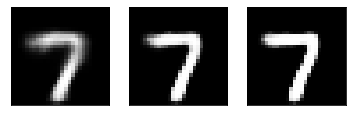

In [113]:

ax = plt.subplot(1,3,1)
rand_enc = np.random.uniform(0, 150, size = (2, 1))
res = decoder2.predict(np.expand_dims(rand_enc, axis=[0]))
plt.imshow(res.reshape(28,28))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,3,2)
res2 = autoencoder.predict(res)
plt.imshow(res2.reshape(28,28))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,3,3)
plt.imshow(autoencoder.predict(res2).reshape(28,28))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()